# Datamining
### Klassifikation und Clustering

<img src="https://avatars.githubusercontent.com/u/49121218?v=4" alt="Avatar" style="float: left; padding-right:1rem; padding-bottom: .5rem;" width=80/>

📝 [Oguzhan-Burak Bozkurt](https://github.com/0xBuro)<br/>
🗓️ Mai 2023 <br/>

Tools: <br/>
<div>

[<img src="https://simpleicons.org/icons/python.svg" alt="Python" width="28"/>](https://www.python.org/)
[<img src="https://simpleicons.org/icons/jupyter.svg" alt="Jupyter" width="28"/>](https://jupyter.org/)
[<img src="https://simpleicons.org/icons/pandas.svg" alt="Pandas" width="28"/>](https://pandas.pydata.org/)
[<img src="https://simpleicons.org/icons/scikitlearn.svg" alt="Sickit-Learn" width="28"/>](https://scikit-learn.org)
<br/>

## Entscheidung für Datensatz
Wir Filtern die Datensätze auf https://archive.ics.uci.edu/ml/datasets.php mit folgenden Eigenschaften:
 1. Default Task = Classification
 2. Attribute Type = Numerical
 3. Data Type = Multivariate
 4. Attributes = 10 to 100
 5. Instances = Greater than 1000
 6. Format Type = Matrix

und wählen noch eine Kategorie die uns interessiert. Hier entscheide ich mich für Area = Business.

-> gefilterter Link findet 11 Datensätze: https://archive.ics.uci.edu/ml/datasets.php?format=mat&task=cla&att=num&area=bus&numAtt=10to100&numIns=greater1000&type=mvar&sort=nameUp&view=table

## Ausgewählter Datensatz
#### default of credit card clients Data Set
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

Bei dem default of credit card clients Datensatz handelt es sich um eine Studie zur Ermittlung der Genauigkeit der Wahrscheinlichkeitsvorhersage von 6 verschiedenen Datamining Techniken zu Vorhersage von vertragsgemäßen Zahlungen von Kreditnehmern in Taiwan. Die Studie wurde durch Prof. I-Cheng Yeh der Fakultät für Informationsmanagement an der Chung-Hua Universität in Zusammenarbeit mit der Tamkang Universität in Taiwan bereitgestellt. Die Studie wird auf den 26.01.2016 datiert.
Da die reale Wahrscheinlichkeit des Ausfalls nicht bekannt ist, wurden in der Studie eine lineare Regression zu den Regressionswerten der 6 Datamining Methoden durchgeführt, um das beste Klassifikationsverfahren zu erproben. Es wurde mit folgenden Verfahren getestet:

- K-nearest neighbor (KNN)
- Logistic regression (LR)
- Discriminant Analysis (DA)
- Naive Bayesian (NB)
- Artificial Neural Networks (ANN)
- Classification Trees (CTs)

wobei die Methode künstliche neuronale Netze (ANN) am besten abschneidete. Aus der Studie geht eine hohe Genauigkeit der Wahrscheinlichkeitsvorhersage und sogar die beste Effizienz für diese Methode hervor (R2 = 0,9647, ri = 0.0145 und Koeffizient = 0.9971). Mehr zur Studie hier: https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

##### Charakteristika
- Datensatz: Multivariate Staistik als Vergleich von mehreren Variablen gleichzeitig.
- Attribute: numerische Daten, reale Daten
- Aufgabe zu Klassifikationsverfahren
- Felder: 24, Dateninstanzen: 30000
- Keine fehlenden Werte gefunden
- Themenbereich: Business

##### Felder:
* X1: Höhe des Kredits (numerisch Dollar)
* X2: Geschlecht (1 = männlich, 2 = weiblich)
* X3: Bildungsgrad (1 = graduate school, 2 = university, 3 = high school, 4 = other)
* X4: Familienstand (1 = verheiratet, 2 = single, 3 = andere)
* X5: Alter (Jahre)
* X6..X11: Zahlungsverlauf Status der Monate April - September (repayment status september 2005, repayment status august 2005...) wobei -1 pay duly (ordnungsgemäß), 1 = delay (verzug 1 Monat) 2 = delay (verzug 2 Monate)...
* X12-X17: Rechnungsauszug (numerisch Dollar) September -> April 2005
* X18-X23: vorherige Zahlungen (numerisch Dollar) September -> April 2005

##### Info
Im Finanz- und Kreditwesen spricht man hier von Kredit- bzw. Ausfallrisiko, also der Gefahr, dass ein Kreditnehmer einen bereits erhaltenen Kredit gar nicht oder nur unvollständig zurückzahlen kann. Die Bestimmung des Adressrisiko ist in der Risikosteuerung bedeutender als die Bestimmung von Kreditwürdigkeit.

## Bearbeitung der Aufgabe

#### Einlesen der Daten

In [45]:
import pandas as pd

# 1. Zeile überspringen, da hier nur mit X1-X23 bis einschließlich Y annotiert wurde
df = pd.read_excel("default_of_credit_clients.xls", skiprows=1, index_col='ID')

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Wir haben vollständig numerische Werte. Keine Transformation nötig.
In Excel haben wir bereits überprüft, ob Zielvariablen fehlen. Für die Zielvariable Y konnten keine Daten mit fehlenden Werten identifiziert werden. In den anderen Spalten fehlen auch keine numerischen Werte.

#### Aufteilung der Daten in Test und Trainingsdaten

In [36]:
from sklearn.model_selection import train_test_split

# Aufteilen in x = Features, y = Zielvariable
x = df.drop('default payment next month', axis=1)
y = df['default payment next month']

# 20% der Daten in Testdaten umwandeln, Zufallsgenerator = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ausgabe
print('Trainingsdaten Größe:', x_train.shape)
print('Testdaten Größe:', x_test.shape)

Trainingsdaten Größe: (24000, 23)
Testdaten Größe: (6000, 23)


### Klassifikation der Testdaten
wir wollen, wie bereits aus der Studie als optimalen Classifier bekannt, mit einem künstlichen neuronalen Netz (ANN) klassifizieren. Scikit-Learn hat eine große Auswahl an Klassifikationsverfahren, für KNN würde sich aber auch TensorFlows keras Library sehr gut eignen. Wir verwenden im Rahmen dieser Übung aber trotzdem ein Verfahren aus Sklearn. Eine vereinfachte Implementierung künstlicher neuronaler Netze in Sklearn ist der Multi-Layer Perceptron (MLP), ein überwachtes Modell, welches Algorithmen des stochastischen Gradientverfahrens (SGD) nutzt.

MLP lernt die Fuktion f( &bull; ): R<sup>m</sup> -> R<sup>o</sup>, wobei m = Anzahl der Dimension für Eingabe und o = Anzahl der Dimension für Ausgabewert. In unserem Fall x1..x23 und Zielvariable y.


In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialisierung des Modells mit dem Adam Algorithmus als solver, ein stochastischer Optimizer.
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500)

# Training des Modells
model.fit(x_train, y_train)

# Vorhersage auf Testdaten
predictions = model.predict(x_test)

# Auswertung der Vorhersage nach Accuracy: Proportion korrekt klassifizierter Instanzen
accuracy = accuracy_score(y_test, predictions)

print('Accuracy:', accuracy)

Accuracy: 0.7773333333333333


Evaluierung der Klassifikation:

Wir haben eine Proportion von einer Wahrscheinlichkeit von ca. 78,1% für korrekten Klassifizierung zu 21,9% falschen Vorhersagen. Wir schauen noch auf weitere Metriken.

In [38]:
from sklearn.metrics import classification_report

# Berechne die Evaluierungsmetriken
report = classification_report(y_test, predictions)

# Gib den Report aus
print(report)

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4687
           1       0.40      0.03      0.06      1313

    accuracy                           0.78      6000
   macro avg       0.59      0.51      0.47      6000
weighted avg       0.70      0.78      0.70      6000



Wir haben auch eine Hohe Präzision bei positiv vorhergesagten Instanzen. Der Recall Wert von 1 deutet auf einen sehr guten Klassifikator, der postivite Instanzen die tatsächlich Postitiv ist zu erkennen. Beide Werte führen zu einem F1-Score von 0.88, dem harmonischen Mittel aus Präzision und Recall.

### Clustering der Testdaten
Wir nutzen den KMeans aus Scikit-Learn. KMeans clustert die Daten indem es die Daten in n-Anzahl von Gruppen mit gleicher Varianz aufteilt. Die Anzahl der Cluster wird in K repräsentiert. Wir nutzen die Elbow Method um einen guten n-Wert zu wählen. Bei der Elbow Method schauen wir uns die Kurve aus der within-cluster sum of squares (WCSS) an. Der Punkt, an dem unsere Kurve abflacht ist der Punkt, andem die Model-Komplexität in einem trade-off zu der Varianz in den Clustern danach führt. Wir wählen also einen Punkt, an dem sich die Kurve anfängt abzuflachen.

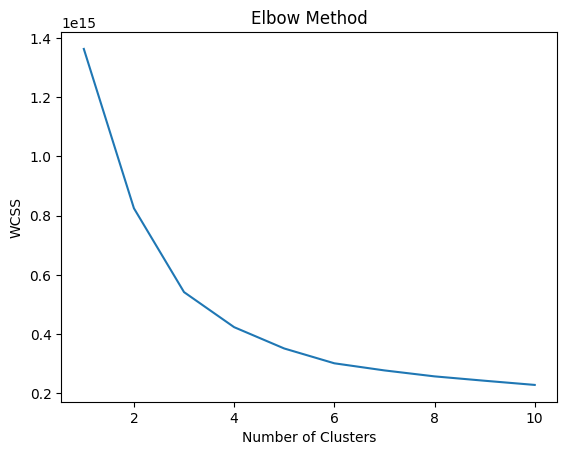

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# Future Warnings ignorieren, irritiert nur im Output
warnings.filterwarnings("ignore")

# min 1 Cluster bis max 10 Cluster
cluster_range = range(1, 11)

# wcss in einer Liste zurückgeben
wcss = []

# wcss für jedes Cluster
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Ausgabe des Plot
plt.plot(cluster_range, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Der Punkt zwischen 2 und 4 (3) sieht gut aus. Wir nehmen uns vor mit n = 3 Clustern zu arbeiten.

In [42]:
from sklearn.cluster import KMeans 

# Initialisierung des Kmeans-Cluster Algorithmus 
kmeans = KMeans(n_clusters=3)

# Anpassung des Modells an die Daten
kmeans.fit(x)

# Cluster-Zuordnung Predictions
cluster_labels = kmeans.predict(x)

# Ausgabe der Zuordnung (auf 20 Cluster beschränkt)
print('Cluster:', cluster_labels[:20])

Cluster: [0 0 0 0 0 0 2 0 0 0 1 1 1 0 1 0 0 2 1 0]


Evaluierung des Clusters:

Wir nutzen den Silhouette Coefficient, der die mean intra-cluster Distanz (a) und die mean nearest-cluster Distanz (b) nutzt. Der Koeffizient ist also (b - a) / max(a, b). Der beste möglich Rückgabewert ist 1 und der schlechteste Wert ist -1.

In [43]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x, cluster_labels)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.4510399479869479


Wir sehen einen Wert ziemlich in der Mitte zwischen 0 und 1. Dieses Ergebnis deutet auf ein moderates Maß an Trennung Kohärenz zwischen den Clustern in den Daten. Einerseits bedeutet das, dass unsere Cluster voneinander unterscheidbarer Natur sind, es aber andererseits trotzdem zu gewissen Überlappung oder Mehrdeutigkeit vorhanden ist.